In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

### CIFAR10 Dataset 생성 
* tf.keras.datasets의 cifar10.load_data()는 웹에서 Local computer로 Download후 train과 test용 image와 label array로 로딩. 

In [2]:
from tensorflow.keras.datasets import cifar10

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

170508288/170498071 [==============================] - 5s 0us/step
train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


In [3]:
train_images[0, :, :, :], train_labels[0, :]

(array([[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],
 
        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],
 
        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],
 
        ...,
 
        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],
 
        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],
 
        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
  

In [4]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


### CIFAR10 데이터 시각화
* 이미지 크기는 32x32이며 RGB채널. 
* 전반적으로 Label에 해당하는 대상이 이미지의 중앙에 있고, Label 대상 오브젝트 위주로 이미지가 구성. 

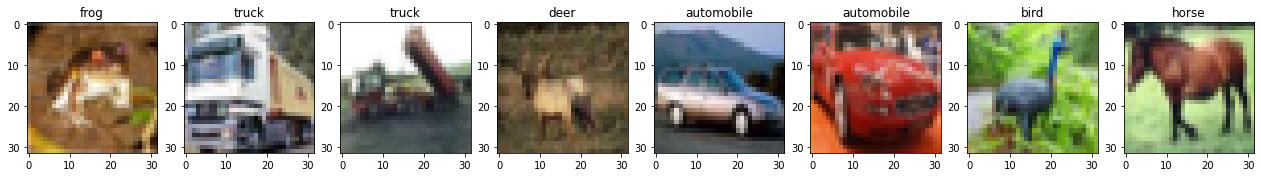

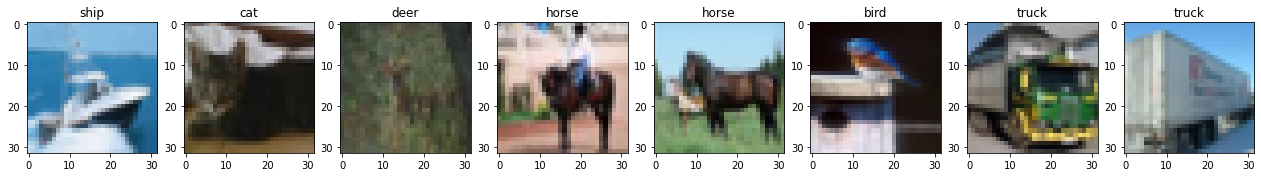

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze() #1차원으로 뭉갠다.
        axs[i].set_title(NAMES[int(label)])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Data preprocessing
* image array의 0 ~ 255 사이의 값으로 되어 있는 pixel intensity 값을 0 ~ 1 사이 값으로 변환. 정수값 pixel 값을 255.0 으로 나눔. 
* label array는 숫자형 값으로 바꾸되, 원-핫 인코딩을 적용할지 선택. 일반적으로 원-핫 인코딩을 적용하는게 Keras Framework활용이 용이
* image array, label array 모두 float32 형으로 변환. numpy 의 float32는 tensor 변환시 tf.float32 로 변환되며 기본적으로 Tensorflow backend Keras는 tf.float32를 기반으로 함. 


In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# label은 원-핫 인코딩이 Keras에서는 활용이 용이하나, 여기서는 sparse categorical crossentropy 테스트를 위해 적용하지 않음. 
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [7]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [8]:
# Keras는 CNN(정확히는 CNN 2D) 모델에 학습 데이터를 입력할 시 반드시 Image array는 4차원 배열이 되어야 함. 
# RGB 채널 이미지 array는 기본적으로 3차원임. 여기에 이미지의 갯수를 포함하므로 4차원이 됨.  
# 만일 Grayscale인 2차원 이미지 array라도 의도적으로 채널을 명시해서 3차원으로 만들어 주고, 여기에 이미지 개수를 포함해서 4차원이 됨. 

print(train_images.shape, train_labels.shape)

(50000, 32, 32, 3) (50000, 1)


In [9]:
# label 데이터가 2차원임. 이를 Keras 모델에 입력해도 별 문제없이 동작하지만, label의 경우는 OHE적용이 안되었는지를 알 수 있게 명확하게 1차원으로 표현해 주는것이 좋음. 
# 2차원인 labels 데이터를 1차원으로 변경. 
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model 생성
* CNN Model의 맨처음 Layer는 Input layer. Input layer의 shape를 이미지 사이즈와 RGB 3채널에 맞게 (32, 32, 3) 으로 설정.
* Conv 연산을 연달아 적용하고 MaxPooling을 적용하는 루틴으로 모델 생성. MaxPooling을 적용 후에는 필터 갯수를 더욱 증가 시킴. 
* MaxPooling 적용 후에 출력 피처맵의 사이즈는 작아지되, 채널(깊이)는 늘어나는 형태로 모델 생성. 
* CIFAR10의 Label수가 10개이므로 Classification을 위한 맨 마지막 Dense layer의 units 갯수는 10개임
* label값이 원-핫 인코딩 되지 않았기 때문에 model.compile()에서 loss는 반드시 sparse_categorical_crossentropy여야함. 
* 만일 label값이 원-핫 인코딩 되었다면 loss는 categorical_crossentropy 임. 

In [10]:
IMAGE_SIZE = 32

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                             

In [12]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이 아니므로 loss는 sparse_categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습 수행 및 테스트 데이터로 평가 
* Model의 fit() 메소드를 호출하여 학습
* fit()은 학습 데이터가 Numpy array 자체로 들어올때, Generator 형태로 들어올때 약간의 수행로직 차이가 있음. 
* 인자로 x에는 학습 image data, y는 학습 label 데이터. 
* batch_size는 한번에 가져올 image/label array 갯수. 1개씩 가져오면 수행속도가 너무 느리고, 전체를 가져오면 GPU Memory 부족이 발생할 수 있으므로 적절한 batch_size 설정이 필요. 만약 학습 데이터가 generator일 경우, fit()에서 batch_size를 설정하지 않음. 
* epochs 는 전체 학습 데이터 학습을 반복 수행할 횟수
* steps_per_epoch는 전체 학습 데이터를 몇번 배치 작업으로 수행하는가를 의미. 보통 입력데이터가 generator일 경우 설정. 
* validation_data는 검증용 데이터 세트
* validation_steps는 검증용 데이터의 steps_per_epoch임. 
* validation_split는 validation_data로 별도의 검증용 데이터 세트를 설정하지 않고 자동으로 학습용 데이터에서 검증용 데이터 세트 분할. 


In [13]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 15s 9ms/step - loss: 1.6431 - accuracy: 0.3896 - val_loss: 1.2502 - val_accuracy: 0.5412
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1753 - accuracy: 0.5775 - val_loss: 1.1006 - val_accuracy: 0.6000
Epoch 3/30
665/665 [==============================] - 5s 8ms/step - loss: 0.9867 - accuracy: 0.6512 - val_loss: 0.9196 - val_accuracy: 0.6784
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.8653 - accuracy: 0.6941 - val_loss: 0.8648 - val_accuracy: 0.6987
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7713 - accuracy: 0.7295 - val_loss: 0.7500 - val_accuracy: 0.7389
Epoch 6/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7040 - accuracy: 0.7541 - val_loss: 0.7101 - val_accuracy: 0.7575
Epoch 7/30
665/665 [==============================] - 5s 8ms/step - loss: 0.6481 - accuracy: 0.7743 - val_loss: 0.6796 - val_accuracy: 0.7701
Epoch

313/313 [==============================] - 1s 4ms/step - loss: 0.7215 - accuracy: 0.7948


[0.7215164303779602, 0.7947999835014343]

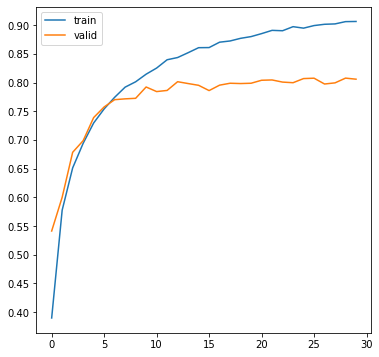

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_labels)

### model.predict()를 통해 이미지 분류 예측
* 4차원 이미지 배열을 입력해서 모델학습함. predict()시에도 4차원 이미지 배열을 입력해야함. 
* 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의  

In [15]:
# 아래 코드는 오류 발생. Conv2D를 사용한 모델에 4차원 이미지 배열을 입력해서 모델을 학습했으므로 predict()시에도 테스트용 4차원 이미지 배열을 입력해야 함.  
preds = model.predict(test_images[0])

ValueError: ignored

In [16]:
# 테스트용 4차원 이미지 배열을 입력해서 predict()수행. 
# predict()의 결과는 softmax 적용 결과임. 학습 데이터의 원-핫 인코딩 적용 여부와 관계없이 softmax 적용 결과는 무조건 2차원 임에 유의 
preds = model.predict(np.expand_dims(test_images[0], axis=0))
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (1, 10)
예측 결과: [[8.6218938e-07 4.3926033e-08 1.5663477e-06 9.6728581e-01 3.1630364e-07
  3.2660455e-02 5.0044571e-05 5.7233314e-07 2.4909630e-07 7.0282113e-09]]


In [17]:
preds = model.predict(test_images[:32], batch_size=32)
print('예측 결과 shape:', preds.shape)
print('예측 결과:', preds)

예측 결과 shape: (32, 10)
예측 결과: [[8.62181935e-07 4.39253647e-08 1.56635508e-06 9.67285812e-01
  3.16304835e-07 3.26605141e-02 5.00442875e-05 5.72338593e-07
  2.49100367e-07 7.02814518e-09]
 [1.14938892e-04 1.20587863e-01 2.14007501e-12 3.57833173e-11
  3.23235972e-14 2.14412797e-12 3.85107901e-09 2.84983002e-13
  8.76854181e-01 2.44307495e-03]
 [8.64226092e-03 5.43070696e-02 4.32974375e-05 4.30154294e-04
  6.05843206e-06 1.73657638e-04 5.27261727e-05 1.24189901e-04
  9.25418317e-01 1.08022513e-02]
 [8.66709411e-01 2.60031503e-03 1.46771330e-04 4.34619251e-05
  3.07050155e-04 3.25513213e-07 1.49086118e-05 2.51310617e-08
  1.17838584e-01 1.23391533e-02]
 [5.13197756e-06 3.81583050e-05 6.24721795e-02 5.40255150e-03
  4.42705341e-02 7.95723918e-06 8.87769222e-01 6.26771701e-09
  3.36700869e-05 6.45581281e-07]
 [5.02847615e-05 1.54658686e-03 1.17142603e-03 1.92175806e-02
  1.57025899e-03 9.42821335e-03 9.66462016e-01 2.36084976e-04
  1.99712566e-04 1.17802112e-04]
 [6.16025878e-04 8.98010433e-

In [18]:
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [3 8 8 0 6 6 1 6 3 9 5 9 4 7 9 8 5 3 8 6 7 0 4 9 4 2 3 0 9 6 6 5]


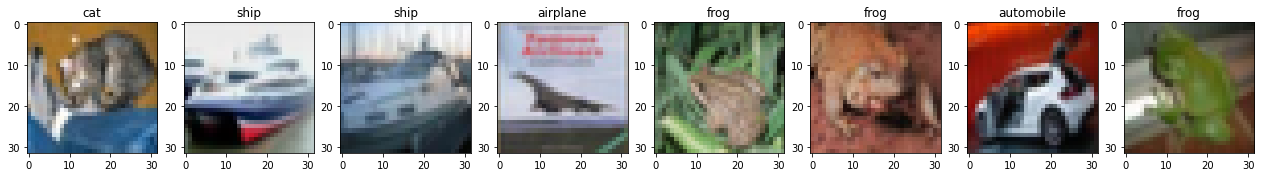

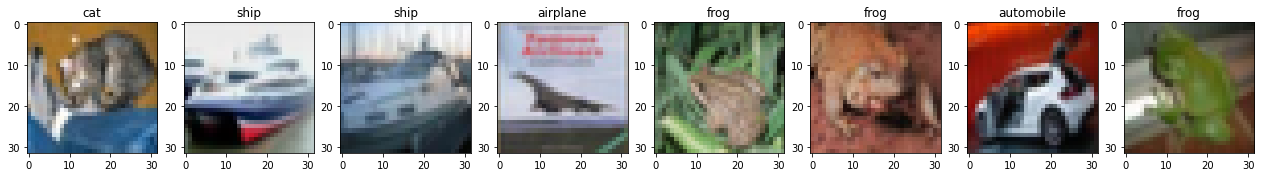

In [19]:
show_images(test_images[:8], predicted_class[:8], ncols=8)
show_images(test_images[:8], test_labels[:8], ncols=8)

### 평균이 1 이고 표준편차가 1인 표준 정규분포에서 난수 추출
* 표준 편차가 클 수록 개별 값의 크기가 일반적으로 커짐.

In [20]:
numbers = np.random.normal(loc=0.0,scale=1,size=[100, 100]) # loc : 평균, scale : 표준편차
print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[ 1.83356416 -1.03519923 -2.92855467 ...  0.09340669 -0.20535597
   1.80518345]
 [-0.2960175  -0.35273705  2.0951654  ...  0.0850257   1.55570778
  -0.08311925]
 [-0.1060815  -1.36484864 -0.02017325 ...  0.85074671  0.35190705
   0.09792691]
 ...
 [-1.72713002 -0.02732661  0.62581662 ...  1.29426013  0.94696078
   1.40604577]
 [-0.20531254  0.75440582  0.40771116 ...  0.1695373  -0.35280009
  -0.93006412]
 [ 0.933264   -1.08299544 -0.46826319 ... -0.9560772   0.95239453
  -0.87779834]]
-0.006145147140609905
1.0001241646948078
-61.451471406099046


### Xavier initialization - 정규분포(glorot_normal), 균일분포(glorot_uniform) 

In [21]:
# glorot_normal
fan_in = 20
fan_out = 15
scale_value = np.sqrt(2/(fan_in + fan_out))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.23904572186687872
[[-0.26589931  0.42442414 -0.27190804 ... -0.03940162  0.18858326
   0.074929  ]
 [-0.04218049 -0.14301525 -0.11471393 ... -0.48502664 -0.10236788
   0.05327032]
 [ 0.45068218  0.22501429 -0.02691844 ... -0.16408244 -0.04009055
   0.25347736]
 ...
 [ 0.77117198 -0.07704369 -0.01240828 ... -0.04694328 -0.43041
   0.29029633]
 [ 0.02829268 -0.29933424  0.11888536 ... -0.06285411  0.09110431
   0.00341301]
 [-0.29983796  0.26627188  0.0127393  ...  0.07482808  0.29433373
  -0.28010953]]
weights mean: 0.0014487226978850732 std: 0.23829824169950126 sum: 14.487226978850732


In [22]:
# glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.5773502691896257
[[-0.27368366 -0.33135037 -0.35896768 ...  0.37270681 -0.1108517
   0.1009777 ]
 [ 0.07559729 -0.31337256  0.20199094 ... -0.56665616 -0.16489949
  -0.10025029]
 [-0.55045245  0.20266743  0.50431498 ... -0.47453307 -0.40707105
   0.12180443]
 ...
 [ 0.28587349  0.32560717 -0.17475647 ...  0.27064497 -0.34644678
  -0.30402661]
 [-0.42474799  0.25547168 -0.0435187  ... -0.10776355  0.51242304
   0.28365603]
 [-0.03379863 -0.3142017   0.30201453 ... -0.29005378  0.03962595
  -0.21878242]]
weights mean: -0.0033208842179182135 std: 0.3332704665331379 sum: -33.208842179182135


### He initialization - 정규분포(he_normal), 균일분포(he_uniform) 

In [23]:
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in))
print('scale:', scale_value)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

scale: 0.4472135954999579
[[ 4.13924988e-01 -3.99431220e-01 -7.81711553e-01 ...  1.75717291e-02
  -3.13469200e-01 -2.44726260e-01]
 [ 6.22086078e-01 -5.24165951e-01  5.25304434e-01 ... -4.53124331e-01
  -3.03096548e-01  1.18245942e-01]
 [-4.96845545e-01  2.56010160e-01  1.07351517e+00 ...  8.32371449e-02
   3.48107927e-01  7.63664831e-02]
 ...
 [ 4.51418375e-01  6.72647369e-01  1.92144644e-01 ... -5.89878487e-01
   4.26136354e-01 -1.57387876e-01]
 [-1.98260962e-01 -1.10900925e-01 -3.04216360e-01 ...  1.17786607e-01
   2.06265575e-01 -1.82091984e-01]
 [-7.52913141e-02 -6.50189273e-01  2.94281948e-01 ...  2.45794224e-01
  -2.40896726e-01 -8.35770210e-04]]
weights mean: -0.0020324661297705313 std: 0.44798736547436513 sum: -20.324661297705312


In [24]:
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in))
print('limit:', limit)
weights = np.random.uniform(-1*limit, limit, size=(100, 100))
print(weights)
print('weights mean:',weights.mean(), 'std:', weights.std(), 'sum:', weights.sum())

limit: 0.7745966692414834
[[-4.84629779e-01  3.14169408e-01  4.95403415e-01 ... -7.65102655e-01
  -7.68241639e-01  5.66837942e-01]
 [-1.77215366e-01  6.15522471e-01  5.51439665e-01 ... -5.92183391e-01
   3.98726135e-01 -2.14976917e-01]
 [-1.59897424e-01  6.21111163e-01 -1.25826121e-01 ...  7.69204459e-01
   7.58359077e-01 -9.01749417e-02]
 ...
 [-6.20311953e-03  6.49290948e-01  3.08744852e-01 ...  1.81384904e-01
  -4.25826465e-01  5.81349380e-01]
 [ 4.27489693e-01  7.71691532e-02  5.01170615e-01 ...  7.11836400e-04
   5.87170693e-01  7.31846279e-01]
 [ 2.01402852e-01  1.67250984e-02 -4.82046603e-01 ... -2.60023191e-01
   4.53726971e-01  3.96221805e-01]]
weights mean: 0.003059274760818748 std: 0.4448206368991608 sum: 30.59274760818748


### weight 초기화를 He Normal로 변경 후 성능 검증
* Keras Conv2D의 기본 weight 초기화는 glorot_uniform임. 이를 he_normal로 변경 후 동일 모델로 성능 테스트 
* label은 원-핫 인코딩을 적용 

In [25]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    labels = labels.squeeze()
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
print(train_images.shape, train_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                           

In [27]:
# optimizer는 Adam으로 설정하고, label값이 원-핫 인코딩이므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 6s 9ms/step - loss: 1.5851 - accuracy: 0.4166 - val_loss: 1.2174 - val_accuracy: 0.5599
Epoch 2/30
665/665 [==============================] - 5s 8ms/step - loss: 1.1232 - accuracy: 0.5997 - val_loss: 0.9258 - val_accuracy: 0.6745
Epoch 3/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9149 - accuracy: 0.6791 - val_loss: 0.8833 - val_accuracy: 0.6900
Epoch 4/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7992 - accuracy: 0.7201 - val_loss: 0.7556 - val_accuracy: 0.7369
Epoch 5/30
665/665 [==============================] - 5s 8ms/step - loss: 0.7113 - accuracy: 0.7510 - val_loss: 0.6844 - val_accuracy: 0.7611
Epoch 6/30
665/665 [==============================] - 6s 8ms/step - loss: 0.6467 - accuracy: 0.7725 - val_loss: 0.6426 - val_accuracy: 0.7815
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.5952 - accuracy: 0.7911 - val_loss: 0.6348 - val_accuracy: 0.7796
Epoch

313/313 [==============================] - 1s 4ms/step - loss: 0.7251 - accuracy: 0.7929


[0.7251267433166504, 0.792900025844574]

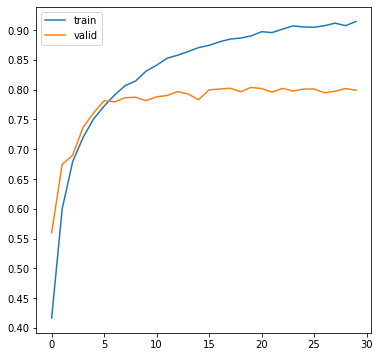

In [28]:
show_history(history)

# 테스트 데이터로 성능 평가
model.evaluate(test_images, test_oh_labels)

### Batch Normalization을 모델에 적용 후 성능 검증

In [29]:
import tensorflow as tf
import numpy as np
import random as python_random

np.random.seed(2021)
python_random.seed(2021)
tf.random.set_seed(2021)

In [31]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                           

In [32]:
# label값이 원-핫 인코딩이 아니므로 loss는 categorical_crossentropy 임. 
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5736 - accuracy: 0.4310 - val_loss: 1.4795 - val_accuracy: 0.4720
Epoch 2/30
665/665 [==============================] - 6s 10ms/step - loss: 1.0972 - accuracy: 0.6108 - val_loss: 1.5762 - val_accuracy: 0.5208
Epoch 3/30
665/665 [==============================] - 6s 10ms/step - loss: 0.9072 - accuracy: 0.6837 - val_loss: 0.9739 - val_accuracy: 0.6633
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7907 - accuracy: 0.7233 - val_loss: 0.8915 - val_accuracy: 0.7023
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7106 - accuracy: 0.7556 - val_loss: 0.8256 - val_accuracy: 0.7269
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6445 - accuracy: 0.7766 - val_loss: 0.7894 - val_accuracy: 0.7180
Epoch 7/30
665/665 [==============================] - 6s 10ms/step - loss: 0.5874 - accuracy: 0.7970 - val_loss: 0.7067 - val_accuracy: 0.7533

In [33]:
model.evaluate(test_images, test_oh_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.7340 - accuracy: 0.8207


[0.7339659929275513, 0.8206999897956848]

### He Normal 적용 후 Batch Normalization

In [34]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = Activation('relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

# cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                          

In [35]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 10s 13ms/step - loss: 1.5846 - accuracy: 0.4187 - val_loss: 1.2641 - val_accuracy: 0.5448
Epoch 2/30
665/665 [==============================] - 7s 10ms/step - loss: 1.1346 - accuracy: 0.5974 - val_loss: 1.0697 - val_accuracy: 0.6161
Epoch 3/30
665/665 [==============================] - 6s 9ms/step - loss: 0.9420 - accuracy: 0.6714 - val_loss: 0.8370 - val_accuracy: 0.7009
Epoch 4/30
665/665 [==============================] - 6s 10ms/step - loss: 0.8145 - accuracy: 0.7155 - val_loss: 0.7003 - val_accuracy: 0.7571
Epoch 5/30
665/665 [==============================] - 6s 10ms/step - loss: 0.7282 - accuracy: 0.7490 - val_loss: 0.9950 - val_accuracy: 0.7047
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 0.6590 - accuracy: 0.7716 - val_loss: 0.9049 - val_accuracy: 0.7023
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.5951 - accuracy: 0.7954 - val_loss: 0.7250 - val_accuracy: 0.7505
E

In [36]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 5ms/step - loss: 0.7501 - accuracy: 0.8269


[0.7501468062400818, 0.8269000053405762]

In [37]:
preds = model.predict(np.expand_dims(test_images[0], axis=0))
predicted_class = np.argmax(preds, axis=1)
print('예측 클래스 값:', predicted_class)

예측 클래스 값: [6]


### 학습 시 데이터를 섞는 shuffle 적용 유무에 따른  성능 테스트

In [38]:
import tensorflow as tf
import numpy as np
import random as python_random
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# seed 를 설정해서 학습시마다 동일한 결과 유도. 불행히도 의도한 대로 동작하지 않음. 
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    python_random.seed(seed_value)
    tf.random.set_seed(seed_value)

# 0 ~ 1사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용. 
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels ) 

In [39]:
from tensorflow.keras.datasets import cifar10

# random seed는 2021로 고정.
set_random_seed(2021)
# CIFAR10 데이터 재 로딩 및 Scaling/OHE 전처리 적용하여 학습/검증/데이터 세트 생성. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
(42500, 32, 32, 3) (42500, 10) (7500, 32, 32, 3) (7500, 10) (10000, 32, 32, 3) (10000, 10)


### model 생성을 위한 별도 함수 생성

In [40]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

def create_model():
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    #x = Conv2D(filters=32, kernel_size=(5, 5), padding='valid', activation='relu')(input_tensor)
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=64, kernel_size=3, padding='same')(x)
    x = Activation('relu')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=2)(x)

    # cifar10의 클래스가 10개 이므로 마지막 classification의 Dense layer units갯수는 10
    x = Flatten(name='flatten')(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(300, activation='relu', name='fc1')(x)
    x = Dropout(rate=0.3)(x)
    output = Dense(10, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    #model.summary()
    
    return model


### shuffle을 False/True 변경하면서 테스트 

In [41]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# 먼저 shuffle을 false로 테스트 
noshuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=False, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

# model이 반복적으로 메모리 차지하는것을 없애기 위해서 수행. 
tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 7s 10ms/step - loss: 1.5717 - accuracy: 0.4306 - val_loss: 1.2359 - val_accuracy: 0.5453
Epoch 2/30
665/665 [==============================] - 6s 10ms/step - loss: 1.1108 - accuracy: 0.6034 - val_loss: 1.2052 - val_accuracy: 0.5685
Epoch 3/30
665/665 [==============================] - 6s 9ms/step - loss: 0.9110 - accuracy: 0.6793 - val_loss: 0.9225 - val_accuracy: 0.6809
Epoch 4/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7961 - accuracy: 0.7218 - val_loss: 0.7791 - val_accuracy: 0.7255
Epoch 5/30
665/665 [==============================] - 6s 10ms/step - loss: 0.7149 - accuracy: 0.7537 - val_loss: 0.8355 - val_accuracy: 0.7191
Epoch 6/30
665/665 [==============================] - 6s 10ms/step - loss: 0.6475 - accuracy: 0.7759 - val_loss: 0.9903 - val_accuracy: 0.6900
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.5842 - accuracy: 0.7993 - val_loss: 0.8080 - val_accuracy: 0.7439


### shuffle을 True로 변경하고 학습 및 테스트

In [42]:
model = create_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
# shuffle을 True로 변경하여 학습 및 테스트
shuffle_history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=30, shuffle=True, 
                    validation_data=(val_images, val_oh_labels))
evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=64)
print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)

tf.keras.backend.clear_session()

Epoch 1/30
665/665 [==============================] - 8s 10ms/step - loss: 1.5685 - accuracy: 0.4326 - val_loss: 1.3706 - val_accuracy: 0.5033
Epoch 2/30
665/665 [==============================] - 6s 10ms/step - loss: 1.1037 - accuracy: 0.6069 - val_loss: 1.0401 - val_accuracy: 0.6271
Epoch 3/30
665/665 [==============================] - 6s 10ms/step - loss: 0.9148 - accuracy: 0.6791 - val_loss: 0.8925 - val_accuracy: 0.6844
Epoch 4/30
665/665 [==============================] - 6s 10ms/step - loss: 0.7980 - accuracy: 0.7228 - val_loss: 0.8110 - val_accuracy: 0.7092
Epoch 5/30
665/665 [==============================] - 7s 10ms/step - loss: 0.7210 - accuracy: 0.7498 - val_loss: 0.6760 - val_accuracy: 0.7696
Epoch 6/30
665/665 [==============================] - 7s 10ms/step - loss: 0.6516 - accuracy: 0.7774 - val_loss: 0.7901 - val_accuracy: 0.7301
Epoch 7/30
665/665 [==============================] - 7s 10ms/step - loss: 0.5943 - accuracy: 0.7929 - val_loss: 0.8628 - val_accuracy: 0.7156

### 위에서 수행한 Shuffle테스트 시 validation 데이터 기반 성능 검증 시각화 

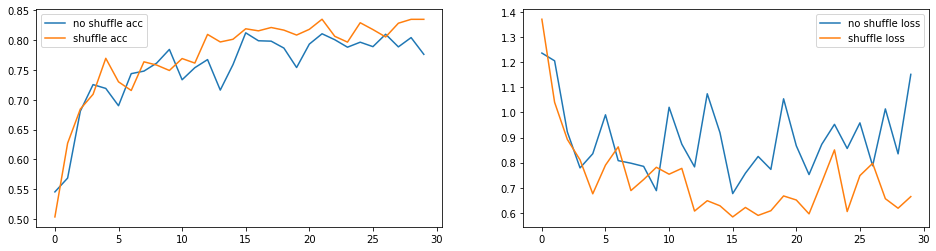

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_shuffle(noshuffle_history, shuffle_history):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
    # shuffle과 no shuffle의 validation accuracy 비교 
    axs[0].plot(noshuffle_history.history['val_accuracy'], label='no shuffle acc')
    axs[0].plot(shuffle_history.history['val_accuracy'], label='shuffle acc')
    # shuffle과 no shuffle의 validation loss 비교 
    axs[1].plot(noshuffle_history.history['val_loss'], label='no shuffle loss')
    axs[1].plot(shuffle_history.history['val_loss'], label='shuffle loss')
    axs[0].legend()
    axs[1].legend()

show_history_shuffle(noshuffle_history, shuffle_history)


### batch 크기를 32, 64, 256, 512로 변경하면서 테스트

In [44]:
b_sizes = [32, 64, 256, 512]
histories = []
evaluations = []
for b_size in b_sizes:
    model = create_model()
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    # batch_size를 순차적으로 32, 64, 256, 512로 변경하여 학습 및 evaluation 수행. 
    print('##### batch size :', b_size, '학습 #####')
    history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=b_size, epochs=30, 
                        shuffle=True, validation_data=(val_images, val_oh_labels))
    # batch size별 학습 history 결과 저장. 
    histories.append(history)
    # 테스트 세트로 evaluation 수행하고 batch size별 결과 저장. 
    evaluation_result = model.evaluate(test_images, test_oh_labels, batch_size=b_size)
    print('#### 테스트 세트로 evaluation 결과 :', evaluation_result)
    evaluations.append(evaluation_result)
    
    tf.keras.backend.clear_session()

##### batch size : 32 학습 #####
Epoch 1/30
1329/1329 [==============================] - 12s 8ms/step - loss: 1.5733 - accuracy: 0.4305 - val_loss: 1.2384 - val_accuracy: 0.5532
Epoch 2/30
1329/1329 [==============================] - 10s 7ms/step - loss: 1.1073 - accuracy: 0.6058 - val_loss: 0.9867 - val_accuracy: 0.6536
Epoch 3/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.9189 - accuracy: 0.6787 - val_loss: 0.9580 - val_accuracy: 0.6675
Epoch 4/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.8091 - accuracy: 0.7205 - val_loss: 0.9701 - val_accuracy: 0.6579
Epoch 5/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.7275 - accuracy: 0.7498 - val_loss: 1.0194 - val_accuracy: 0.6772
Epoch 6/30
1329/1329 [==============================] - 10s 7ms/step - loss: 0.6530 - accuracy: 0.7765 - val_loss: 0.6837 - val_accuracy: 0.7665
Epoch 7/30
1329/1329 [==============================] - 9s 7ms/step - loss: 0.5893 - accuracy: 0.7976

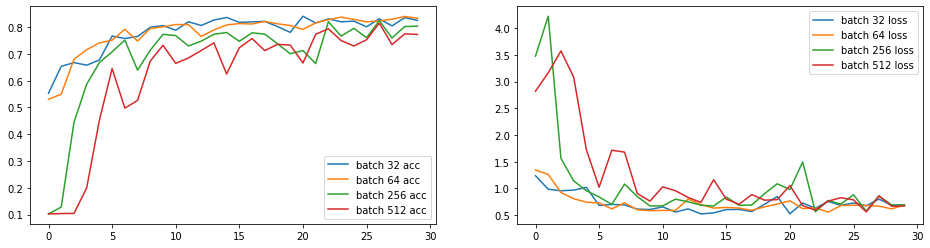

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history_batch(histories):
    figure, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))  
    # batch 크기별 validation accuracy 비교 
    axs[0].plot(histories[0].history['val_accuracy'], label='batch 32 acc')
    axs[0].plot(histories[1].history['val_accuracy'], label='batch 64 acc')
    axs[0].plot(histories[2].history['val_accuracy'], label='batch 256 acc')
    axs[0].plot(histories[3].history['val_accuracy'], label='batch 512 acc')
    
    # batch 크기별 validation loss 비교
    axs[1].plot(histories[0].history['val_loss'], label='batch 32 loss')
    axs[1].plot(histories[1].history['val_loss'], label='batch 64 loss')
    axs[1].plot(histories[2].history['val_loss'], label='batch 256 loss')
    axs[1].plot(histories[3].history['val_loss'], label='batch 512 loss')
    
    axs[0].legend()
    axs[1].legend()

show_history_batch(histories)